# Classifications

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Importing the data

In [2]:
# Firstly let's import data

In [3]:
data_frame=pd.read_excel("D:\\data_.xlsx")
data_frame

,Time spent on lessons/ hour,GPA,Attendance
0,4.0,90.60,Yes
1,7.0,84.50,No
2,12.0,NaN,No
3,2.0,80.00,Yes
4,7.0,98.50,Yes
...,...,...,...
157,1.5,92.27,Yes
158,10.0,72.00,No
159,2.0,74.73,Yes
160,3.0,83.87,Yes


In [4]:
data_frame.columns

Index(['Time spent on lessons/ hour', 'GPA', 'Attendance'], dtype='object')

In [5]:
data_frame.columns=['time_lessons','GPA','attendance']

In [6]:
data_frame

,time_lessons,GPA,attendance
0,4.0,90.60,Yes
1,7.0,84.50,No
2,12.0,NaN,No
3,2.0,80.00,Yes
4,7.0,98.50,Yes
...,...,...,...
157,1.5,92.27,Yes
158,10.0,72.00,No
159,2.0,74.73,Yes
160,3.0,83.87,Yes


In [7]:
data_frame.describe(include='all')

,time_lessons,GPA,attendance
count,158.000000,161.000000,162
unique,NaN,NaN,2
top,NaN,NaN,Yes
freq,NaN,NaN,123
mean,3.970253,85.784348,NaN
std,2.850215,7.794291,NaN
min,0.250000,47.000000,NaN
25%,2.000000,80.000000,NaN
50%,3.000000,87.000000,NaN
75%,5.000000,91.730000,NaN


In [8]:
# As we see, max count in columns is 162 and min count is 158. This means that, there are missing values (null values) in data

### Dealing with null values

In [9]:
data_frame.isnull().sum()

time_lessons    4
GPA             1
attendance      0
dtype: int64

In [10]:
# According to output above, there are 5 missing values and they cover approximately 3.7% of the total data
# If missing values cover less than or equal to 5% of total data, we can remove all them

In [11]:
df=data_frame.dropna(axis=0)

In [12]:
df.describe(include='all')

,time_lessons,GPA,attendance
count,157.000000,157.000000,157
unique,NaN,NaN,2
top,NaN,NaN,Yes
freq,NaN,NaN,123
mean,3.919108,85.734076,NaN
std,2.785652,7.771917,NaN
min,0.250000,47.000000,NaN
25%,2.000000,80.000000,NaN
50%,3.000000,87.000000,NaN
75%,5.000000,91.500000,NaN


In [13]:
# Now the number of rows is the same in all columns

### Dummy variables

In [14]:
df['attendance']=df['attendance'].map({'Yes':1,'No':0})

In [15]:
df

,time_lessons,GPA,attendance
0,4.0,90.60,1
1,7.0,84.50,0
3,2.0,80.00,1
4,7.0,98.50,1
5,2.0,91.26,1
...,...,...,...
157,1.5,92.27,1
158,10.0,72.00,0
159,2.0,74.73,1
160,3.0,83.87,1


# 1. Logistic Regression (Classification)

### Determining  independent and dependent variables

In [16]:
df

,time_lessons,GPA,attendance
0,4.0,90.60,1
1,7.0,84.50,0
3,2.0,80.00,1
4,7.0,98.50,1
5,2.0,91.26,1
...,...,...,...
157,1.5,92.27,1
158,10.0,72.00,0
159,2.0,74.73,1
160,3.0,83.87,1


In [17]:
y=df.iloc[:,-1].values
x=df.iloc[:,:-1].values

In [18]:
x

array([[ 4.  , 90.6 ],
       [ 7.  , 84.5 ],
       [ 2.  , 80.  ],
       [ 7.  , 98.5 ],
       [ 2.  , 91.26],
       [ 2.5 , 80.  ],
       [ 3.  , 86.  ],
       [ 4.5 , 71.  ],
       [ 4.5 , 82.  ],
       [ 2.  , 85.33],
       [ 8.5 , 95.56],
       [ 1.5 , 92.3 ],
       [ 2.5 , 72.  ],
       [ 5.5 , 80.  ],
       [ 3.5 , 75.7 ],
       [ 1.5 , 88.83],
       [ 6.  , 93.9 ],
       [ 0.25, 90.11],
       [ 0.3 , 47.  ],
       [ 1.5 , 86.  ],
       [ 2.  , 95.4 ],
       [12.  , 89.5 ],
       [12.5 , 80.  ],
       [ 4.  , 76.63],
       [ 2.  , 76.  ],
       [ 1.5 , 91.73],
       [ 9.  , 91.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 77.  ],
       [ 3.5 , 87.  ],
       [ 1.5 , 81.  ],
       [ 5.  , 84.  ],
       [ 3.  , 94.2 ],
       [ 1.5 , 80.  ],
       [ 1.5 , 83.  ],
       [ 4.5 , 77.2 ],
       [ 5.  , 84.  ],
       [ 2.  , 83.67],
       [ 2.5 , 91.5 ],
       [11.  , 77.  ],
       [ 3.  , 87.  ],
       [ 4.5 , 96.5 ],
       [ 0.5 , 88.03],
       [ 1.

In [19]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

## Train and test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [22]:
type(x_train)

numpy.ndarray

In [23]:
type(y_train)

numpy.ndarray

In [24]:
x_train

array([[ 2.5 , 76.  ],
       [ 1.5 , 80.  ],
       [ 0.5 , 87.  ],
       [ 5.5 , 78.  ],
       [ 4.  , 82.  ],
       [ 3.  , 79.  ],
       [ 5.  , 80.  ],
       [ 3.  , 94.  ],
       [ 5.5 , 92.6 ],
       [ 4.  , 77.  ],
       [ 5.  , 85.  ],
       [ 2.5 , 91.3 ],
       [ 8.  , 96.  ],
       [ 0.25, 90.11],
       [10.  , 92.85],
       [ 4.5 , 89.  ],
       [11.  , 98.6 ],
       [ 7.  , 79.47],
       [ 0.3 , 47.  ],
       [ 1.5 , 92.  ],
       [ 2.  , 91.26],
       [ 3.5 , 93.  ],
       [ 1.  , 89.  ],
       [11.  , 77.  ],
       [ 5.  , 84.  ],
       [ 3.  , 81.  ],
       [ 0.5 , 94.04],
       [ 0.5 , 83.  ],
       [ 2.5 , 72.  ],
       [ 1.5 , 92.3 ],
       [ 2.  , 77.5 ],
       [ 0.5 , 82.  ],
       [ 2.5 , 89.43],
       [10.5 , 98.67],
       [ 2.  , 80.  ],
       [ 9.  , 83.  ],
       [ 3.  , 86.  ],
       [ 4.  , 90.6 ],
       [ 5.  , 84.  ],
       [ 4.5 , 96.  ],
       [ 4.5 , 90.5 ],
       [ 2.  , 83.  ],
       [11.5 , 88.  ],
       [ 6.

In [25]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaled=StandardScaler()

In [28]:
x_train_scaled=scaled.fit_transform(x_train)
x_test_scaled=scaled.transform(x_test)

In [29]:
x_train_scaled

array([[-0.50766639, -1.22569969],
       [-0.85433834, -0.72273298],
       [-1.20101028,  0.15745876],
       [ 0.53234944, -0.97421634],
       [ 0.01234152, -0.47124963],
       [-0.33433042, -0.84847466],
       [ 0.35901346, -0.72273298],
       [-0.33433042,  1.0376505 ],
       [ 0.53234944,  0.86161215],
       [ 0.01234152, -1.09995802],
       [ 0.35901346, -0.0940246 ],
       [-0.50766639,  0.69814797],
       [ 1.39902929,  1.28913386],
       [-1.28767826,  0.54851538],
       [ 2.09237318,  0.89304757],
       [ 0.18567749,  0.40894211],
       [ 2.43904512,  1.61606222],
       [ 1.05235735, -0.78937607],
       [-1.27034467, -4.87220834],
       [-0.85433834,  0.78616715],
       [-0.68100236,  0.6931183 ],
       [-0.16099445,  0.91190882],
       [-1.02767431,  0.40894211],
       [ 2.43904512, -1.09995802],
       [ 0.35901346, -0.21976627],
       [-0.33433042, -0.59699131],
       [-1.20101028,  1.04268017],
       [-1.20101028, -0.34550795],
       [-0.50766639,

## Logistic Regression model on training set

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clas = LogisticRegression(random_state = 0)
clas.fit(x_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting training results

In [32]:
clas.predict(([[5,96]]))

array([1], dtype=int64)

In [33]:
# Previously we had to transform values because values were scaled

In [34]:
scaled.transform(([[5,96]]))

array([[0.35901346, 1.28913386]])

In [35]:
clas.predict(([[0.48213316, 1.59691169]]))

array([1], dtype=int64)

In [36]:
clas.predict(scaled.transform(([[5,96]])))

array([1], dtype=int64)

## Predicting test results

In [37]:
y_pred=clas.predict(x_test_scaled)

In [38]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
x_test

array([[ 4.  , 85.  ],
       [ 4.5 , 80.  ],
       [ 5.  , 96.4 ],
       [ 5.  , 84.  ],
       [ 4.5 , 77.2 ],
       [ 3.  , 87.  ],
       [ 3.5 , 75.7 ],
       [ 4.  , 76.71],
       [ 2.5 , 97.3 ],
       [ 2.5 , 95.  ],
       [ 2.  , 71.  ],
       [ 2.5 , 87.72],
       [12.5 , 70.  ],
       [ 3.  , 92.2 ],
       [ 0.25, 93.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 83.63],
       [ 6.  , 93.9 ],
       [ 1.5 , 86.  ],
       [ 3.5 , 87.  ],
       [ 8.  , 81.  ],
       [ 2.  , 94.  ],
       [ 3.  , 80.3 ],
       [ 4.  , 91.33],
       [ 2.5 , 84.2 ],
       [ 2.5 , 88.51],
       [ 5.5 , 89.99],
       [ 0.5 , 88.03],
       [ 0.5 , 84.  ],
       [ 4.  , 91.  ],
       [ 5.5 , 83.66],
       [ 5.5 , 87.  ]])

In [40]:
type(y_pred)

numpy.ndarray

## Confusion Matrix 

In [41]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
data={"Original values (y_test)": y_test,
      "Predicted values (y_pred)": y_pred}

In [44]:
data_=pd.DataFrame(data)

In [45]:
data_

,Original values (y_test),Predicted values (y_pred)
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,1


In [46]:
confusion_matrix=pd.crosstab(data_['Original values (y_test)'],data_['Predicted values (y_pred)'],
                            rownames=['Original values'], colnames=['Predicted values'])

In [47]:
confusion_matrix

Predicted values,0,1
Original values,,
0,2,4
1,0,26


In [48]:
import seaborn as sn

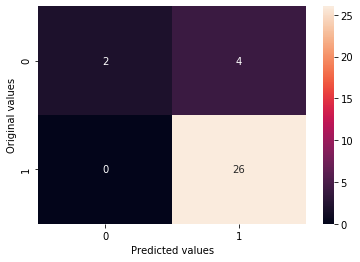

In [49]:
sn.heatmap(confusion_matrix, annot=True)

In [50]:
len(y_pred[y_pred==0])

2

In [51]:
len(y_pred[y_pred==1])

30

## Accuracy Score

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.875


## Visualization of Logistic Regression on training set

In [54]:
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


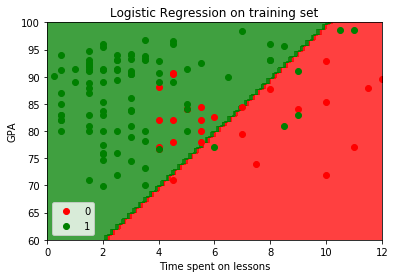

In [55]:
x_set, y_set = scaled.inverse_transform(x_train_scaled), y_train

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(x1, x2, clas.predict(scaled.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title("Logistic Regression on training set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

In [56]:
# As we can see, there are two colors in the graph and some blue dots are spread over the green area of the graph and vice versa. 
# It means these points were guessed incorrectly.
# For example, a student who spend 6 hours on lessons and has about 77 of GPA didn't attend lesson,
# but it is estimated that, that person attended lesson.

In [57]:
x_set

array([[ 2.5 , 76.  ],
       [ 1.5 , 80.  ],
       [ 0.5 , 87.  ],
       [ 5.5 , 78.  ],
       [ 4.  , 82.  ],
       [ 3.  , 79.  ],
       [ 5.  , 80.  ],
       [ 3.  , 94.  ],
       [ 5.5 , 92.6 ],
       [ 4.  , 77.  ],
       [ 5.  , 85.  ],
       [ 2.5 , 91.3 ],
       [ 8.  , 96.  ],
       [ 0.25, 90.11],
       [10.  , 92.85],
       [ 4.5 , 89.  ],
       [11.  , 98.6 ],
       [ 7.  , 79.47],
       [ 0.3 , 47.  ],
       [ 1.5 , 92.  ],
       [ 2.  , 91.26],
       [ 3.5 , 93.  ],
       [ 1.  , 89.  ],
       [11.  , 77.  ],
       [ 5.  , 84.  ],
       [ 3.  , 81.  ],
       [ 0.5 , 94.04],
       [ 0.5 , 83.  ],
       [ 2.5 , 72.  ],
       [ 1.5 , 92.3 ],
       [ 2.  , 77.5 ],
       [ 0.5 , 82.  ],
       [ 2.5 , 89.43],
       [10.5 , 98.67],
       [ 2.  , 80.  ],
       [ 9.  , 83.  ],
       [ 3.  , 86.  ],
       [ 4.  , 90.6 ],
       [ 5.  , 84.  ],
       [ 4.5 , 96.  ],
       [ 4.5 , 90.5 ],
       [ 2.  , 83.  ],
       [11.5 , 88.  ],
       [ 6.

In [58]:
y_set

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [59]:
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.2))

# So x was divided into ranges

In [60]:
x1

array([[-9.75, -9.55, -9.35, ..., 22.05, 22.25, 22.45],
       [-9.75, -9.55, -9.35, ..., 22.05, 22.25, 22.45],
       [-9.75, -9.55, -9.35, ..., 22.05, 22.25, 22.45],
       ...,
       [-9.75, -9.55, -9.35, ..., 22.05, 22.25, 22.45],
       [-9.75, -9.55, -9.35, ..., 22.05, 22.25, 22.45],
       [-9.75, -9.55, -9.35, ..., 22.05, 22.25, 22.45]])

In [61]:
x2

array([[-953. , -953. , -953. , ..., -953. , -953. , -953. ],
       [-952.8, -952.8, -952.8, ..., -952.8, -952.8, -952.8],
       [-952.6, -952.6, -952.6, ..., -952.6, -952.6, -952.6],
       ...,
       [1098.2, 1098.2, 1098.2, ..., 1098.2, 1098.2, 1098.2],
       [1098.4, 1098.4, 1098.4, ..., 1098.4, 1098.4, 1098.4],
       [1098.6, 1098.6, 1098.6, ..., 1098.6, 1098.6, 1098.6]])

In [62]:
x1.min()

-9.75

In [63]:
x1.max()

22.44999999999989

In [64]:
x2.min()

-953.0

In [65]:
x2.max()

1098.6000000004665

In [66]:
# First row of x1

x1.ravel()

array([-9.75, -9.55, -9.35, ..., 22.05, 22.25, 22.45])

In [67]:
x2.ravel()

array([-953. , -953. , -953. , ..., 1098.6, 1098.6, 1098.6])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


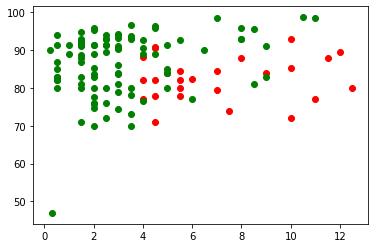

In [68]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    

In [69]:
x_set[y_set == 1, 0]

array([ 2.5 ,  1.5 ,  0.5 ,  3.  ,  5.  ,  3.  ,  5.5 ,  5.  ,  2.5 ,
        8.  ,  0.25,  4.5 , 11.  ,  0.3 ,  1.5 ,  2.  ,  3.5 ,  1.  ,
        3.  ,  0.5 ,  0.5 ,  2.5 ,  1.5 ,  2.  ,  0.5 ,  2.5 , 10.5 ,
        2.  ,  9.  ,  3.  ,  4.  ,  5.  ,  4.5 ,  2.  ,  6.5 ,  2.  ,
        1.5 ,  0.5 ,  1.5 ,  3.5 ,  3.5 ,  8.5 ,  1.5 ,  3.  ,  6.  ,
        2.5 ,  2.  ,  3.  ,  3.5 ,  2.5 ,  4.  ,  5.  ,  2.  ,  1.5 ,
        3.  ,  2.  ,  1.  ,  1.5 ,  1.5 ,  2.5 ,  4.5 ,  2.  ,  8.  ,
        9.  ,  1.5 ,  2.  ,  3.  ,  8.  ,  2.5 ,  4.  ,  7.  ,  3.  ,
        1.5 ,  2.  ,  3.  ,  0.5 ,  0.5 ,  4.  ,  3.5 ,  0.5 ,  3.  ,
        8.5 ,  3.  ,  1.5 ,  1.5 ,  3.  ,  2.  ,  1.5 ,  3.5 ,  2.  ,
        1.5 ,  3.5 ,  2.5 ,  1.5 ,  3.5 ,  0.5 ,  2.  ])

In [70]:
x_set[y_set == 1, 1]

array([76.  , 80.  , 87.  , 79.  , 80.  , 94.  , 92.6 , 85.  , 91.3 ,
       96.  , 90.11, 89.  , 98.6 , 47.  , 92.  , 91.26, 93.  , 89.  ,
       81.  , 94.04, 83.  , 72.  , 92.3 , 77.5 , 82.  , 89.43, 98.67,
       80.  , 83.  , 86.  , 90.6 , 84.  , 96.  , 83.  , 90.  , 91.33,
       94.8 , 80.  , 91.  , 70.  , 78.2 , 95.56, 83.  , 94.2 , 77.  ,
       91.5 , 75.83, 90.44, 96.7 , 80.  , 76.63, 91.4 , 85.33, 92.27,
       91.  , 89.  , 91.5 , 88.  , 88.83, 93.03, 96.5 , 69.87, 93.  ,
       91.  , 91.27, 76.  , 83.87, 93.  , 94.  , 89.  , 98.5 , 93.17,
       81.  , 74.73, 90.5 , 85.  , 82.  , 92.8 , 80.  , 91.3 , 83.67,
       81.  , 74.43, 93.  , 92.6 , 90.56, 95.4 , 91.73, 73.22, 96.  ,
       71.  , 93.33, 93.  , 87.  , 93.8 , 83.  , 83.67])

In [71]:
np.array([x1.ravel(), x2.ravel()]).T

array([[  -9.75, -953.  ],
       [  -9.55, -953.  ],
       [  -9.35, -953.  ],
       ...,
       [  22.05, 1098.6 ],
       [  22.25, 1098.6 ],
       [  22.45, 1098.6 ]])

## Visualization of Logistic Regression on test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


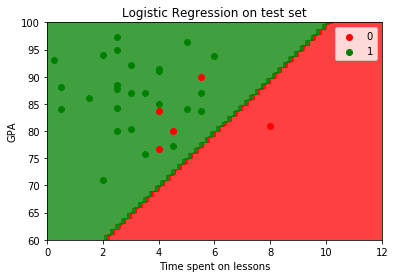

In [72]:
x_set, y_set = scaled.inverse_transform(x_test_scaled), y_test

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(x1, x2, clas.predict(scaled.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
    
plt.title("Logistic Regression on test set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

# 2. K_nearest_neighbors ( K-NN )

In [73]:
df

,time_lessons,GPA,attendance
0,4.0,90.60,1
1,7.0,84.50,0
3,2.0,80.00,1
4,7.0,98.50,1
5,2.0,91.26,1
...,...,...,...
157,1.5,92.27,1
158,10.0,72.00,0
159,2.0,74.73,1
160,3.0,83.87,1


### Determining  independent and dependent variables

In [74]:
x_1=df.iloc[:,:-1].values
y_1=df.iloc[:,-1].values

In [75]:
x_1

array([[ 4.  , 90.6 ],
       [ 7.  , 84.5 ],
       [ 2.  , 80.  ],
       [ 7.  , 98.5 ],
       [ 2.  , 91.26],
       [ 2.5 , 80.  ],
       [ 3.  , 86.  ],
       [ 4.5 , 71.  ],
       [ 4.5 , 82.  ],
       [ 2.  , 85.33],
       [ 8.5 , 95.56],
       [ 1.5 , 92.3 ],
       [ 2.5 , 72.  ],
       [ 5.5 , 80.  ],
       [ 3.5 , 75.7 ],
       [ 1.5 , 88.83],
       [ 6.  , 93.9 ],
       [ 0.25, 90.11],
       [ 0.3 , 47.  ],
       [ 1.5 , 86.  ],
       [ 2.  , 95.4 ],
       [12.  , 89.5 ],
       [12.5 , 80.  ],
       [ 4.  , 76.63],
       [ 2.  , 76.  ],
       [ 1.5 , 91.73],
       [ 9.  , 91.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 77.  ],
       [ 3.5 , 87.  ],
       [ 1.5 , 81.  ],
       [ 5.  , 84.  ],
       [ 3.  , 94.2 ],
       [ 1.5 , 80.  ],
       [ 1.5 , 83.  ],
       [ 4.5 , 77.2 ],
       [ 5.  , 84.  ],
       [ 2.  , 83.67],
       [ 2.5 , 91.5 ],
       [11.  , 77.  ],
       [ 3.  , 87.  ],
       [ 4.5 , 96.5 ],
       [ 0.5 , 88.03],
       [ 1.

In [76]:
y_1

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

## Train and test split

In [77]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_1, y_1, test_size = 0.2, random_state = 1)

In [78]:
x1_train

array([[ 2.5 , 76.  ],
       [ 1.5 , 80.  ],
       [ 0.5 , 87.  ],
       [ 5.5 , 78.  ],
       [ 4.  , 82.  ],
       [ 3.  , 79.  ],
       [ 5.  , 80.  ],
       [ 3.  , 94.  ],
       [ 5.5 , 92.6 ],
       [ 4.  , 77.  ],
       [ 5.  , 85.  ],
       [ 2.5 , 91.3 ],
       [ 8.  , 96.  ],
       [ 0.25, 90.11],
       [10.  , 92.85],
       [ 4.5 , 89.  ],
       [11.  , 98.6 ],
       [ 7.  , 79.47],
       [ 0.3 , 47.  ],
       [ 1.5 , 92.  ],
       [ 2.  , 91.26],
       [ 3.5 , 93.  ],
       [ 1.  , 89.  ],
       [11.  , 77.  ],
       [ 5.  , 84.  ],
       [ 3.  , 81.  ],
       [ 0.5 , 94.04],
       [ 0.5 , 83.  ],
       [ 2.5 , 72.  ],
       [ 1.5 , 92.3 ],
       [ 2.  , 77.5 ],
       [ 0.5 , 82.  ],
       [ 2.5 , 89.43],
       [10.5 , 98.67],
       [ 2.  , 80.  ],
       [ 9.  , 83.  ],
       [ 3.  , 86.  ],
       [ 4.  , 90.6 ],
       [ 5.  , 84.  ],
       [ 4.5 , 96.  ],
       [ 4.5 , 90.5 ],
       [ 2.  , 83.  ],
       [11.5 , 88.  ],
       [ 6.

In [79]:
y1_train

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Scaling the data

In [80]:
scaled1=StandardScaler()

In [81]:
x1_train_scaled=scaled1.fit_transform(x1_train)
x1_test_scaled=scaled1.transform(x1_test)

In [82]:
x1_train_scaled

array([[-0.50766639, -1.22569969],
       [-0.85433834, -0.72273298],
       [-1.20101028,  0.15745876],
       [ 0.53234944, -0.97421634],
       [ 0.01234152, -0.47124963],
       [-0.33433042, -0.84847466],
       [ 0.35901346, -0.72273298],
       [-0.33433042,  1.0376505 ],
       [ 0.53234944,  0.86161215],
       [ 0.01234152, -1.09995802],
       [ 0.35901346, -0.0940246 ],
       [-0.50766639,  0.69814797],
       [ 1.39902929,  1.28913386],
       [-1.28767826,  0.54851538],
       [ 2.09237318,  0.89304757],
       [ 0.18567749,  0.40894211],
       [ 2.43904512,  1.61606222],
       [ 1.05235735, -0.78937607],
       [-1.27034467, -4.87220834],
       [-0.85433834,  0.78616715],
       [-0.68100236,  0.6931183 ],
       [-0.16099445,  0.91190882],
       [-1.02767431,  0.40894211],
       [ 2.43904512, -1.09995802],
       [ 0.35901346, -0.21976627],
       [-0.33433042, -0.59699131],
       [-1.20101028,  1.04268017],
       [-1.20101028, -0.34550795],
       [-0.50766639,

In [83]:
x1_test_scaled

array([[ 0.01234152, -0.0940246 ],
       [ 0.18567749, -0.72273298],
       [ 0.35901346,  1.33943053],
       [ 0.35901346, -0.21976627],
       [ 0.18567749, -1.07480968],
       [-0.33433042,  0.15745876],
       [-0.16099445, -1.2634222 ],
       [ 0.01234152, -1.1364231 ],
       [-0.50766639,  1.45259804],
       [-0.50766639,  1.16339218],
       [-0.68100236, -1.85440808],
       [-0.50766639,  0.24799277],
       [ 2.95905303, -1.98014976],
       [-0.33433042,  0.81131548],
       [-1.28767826,  0.91190882],
       [-0.50766639, -0.72273298],
       [ 0.01234152, -0.26629069],
       [ 0.70568541,  1.02507633],
       [-0.85433834,  0.03171708],
       [-0.16099445,  0.15745876],
       [ 1.39902929, -0.59699131],
       [-0.68100236,  1.0376505 ],
       [-0.33433042, -0.68501048],
       [ 0.01234152,  0.70192022],
       [-0.50766639, -0.19461794],
       [-0.50766639,  0.34732869],
       [ 0.53234944,  0.53342637],
       [-1.20101028,  0.28697269],
       [-1.20101028,

## K-NN model on training set

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
clas1=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [86]:
clas1.fit(x1_train_scaled, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting training results

In [87]:
clas1.predict(([[6,78]]))

array([1], dtype=int64)

In [88]:
clas1.predict(scaled1.transform(([[6,78]])))

array([0], dtype=int64)

In [89]:
scaled1.transform(([[6,78]]))

array([[ 0.70568541, -0.97421634]])

## Predicting test results

In [90]:
y1_pred=clas1.predict(x1_test_scaled)

In [91]:
y1_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

## Confusion Matrix

In [92]:
y1_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [93]:
y1_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [94]:
data1={"Original values (y1_test)": y1_test,
      "Predicted values (y1_pred)": y1_pred}

In [95]:
data1_=pd.DataFrame(data1)

In [96]:
data1_

,Original values (y1_test),Predicted values (y1_pred)
0,1,1
1,0,0
2,1,1
3,1,0
4,1,0
5,1,1
6,1,1
7,0,0
8,1,1
9,1,1


In [97]:
confusion_matrix1=pd.crosstab(data1_['Original values (y1_test)'],data1_['Predicted values (y1_pred)'],
                            rownames=['Original values'], colnames=['Predicted values'])

In [98]:
confusion_matrix1

Predicted values,0,1
Original values,,
0,5,1
1,4,22


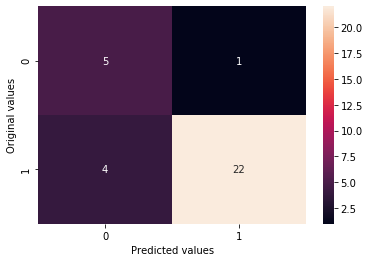

In [99]:
sn.heatmap(confusion_matrix1, annot=True)

In [100]:
len(y1_pred[y1_pred==0])

9

In [101]:
len(y1_pred[y1_pred==1])

23

## Accuracy Score

In [102]:
print("Accuracy Score: ",accuracy_score(y1_test,y1_pred))

Accuracy Score:  0.84375


## Visualization of K-NN model on training set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


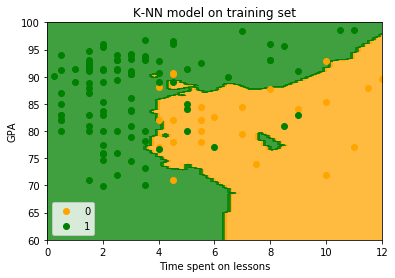

In [103]:
x1_set, y1_set = scaled1.inverse_transform(x1_train_scaled), y1_train

x1_, x2_ = np.meshgrid(np.arange(start = x1_set[:, 0].min() - 10, stop = x1_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x1_set[:, 1].min() - 1000, stop = x1_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(x1_, x2_, clas1.predict(scaled1.transform(np.array([x1_.ravel(), x2_.ravel()]).T)).reshape(x1_.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y1_set)):
    plt.scatter(x1_set[y1_set == j, 0], x1_set[y1_set == j, 1], c = ListedColormap(('orange', 'green'))(i), label = j)
    
plt.title("K-NN model on training set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

In [104]:
x1_.min()

-9.75

In [105]:
x2_.max()

1098.6000000004665

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


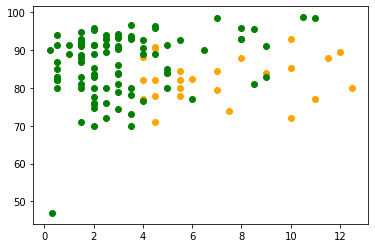

In [106]:
for i, j in enumerate(np.unique(y1_set)):
    plt.scatter(x1_set[y1_set == j, 0], x1_set[y1_set == j, 1], c = ListedColormap(('orange', 'green'))(i), label = j)

## Visualization of K-NN model on test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


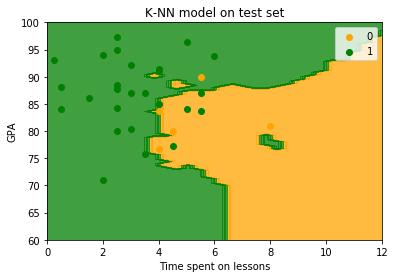

In [107]:
x1_set, y1_set = scaled1.inverse_transform(x1_test_scaled), y1_test

x1_, x2_ = np.meshgrid(np.arange(start = x1_set[:, 0].min() - 10, stop = x1_set[:, 0].max() + 10, step = 0.4),
                     np.arange(start = x1_set[:, 1].min() - 1000, stop = x1_set[:, 1].max() + 1000, step = 0.4))

plt.contourf(x1_, x2_, clas1.predict(scaled1.transform(np.array([x1_.ravel(), x2_.ravel()]).T)).reshape(x1_.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y1_set)):
    plt.scatter(x1_set[y1_set == j, 0], x1_set[y1_set == j, 1], c = ListedColormap(('orange', 'green'))(i), label = j)
    
plt.title("K-NN model on test set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

# 3. Support Vector Machine ( SVM )

In [108]:
df

,time_lessons,GPA,attendance
0,4.0,90.60,1
1,7.0,84.50,0
3,2.0,80.00,1
4,7.0,98.50,1
5,2.0,91.26,1
...,...,...,...
157,1.5,92.27,1
158,10.0,72.00,0
159,2.0,74.73,1
160,3.0,83.87,1


### Determining  independent and dependent variables

In [109]:
x_2=df.iloc[:,:-1].values
y_2=df.iloc[:,-1].values

In [110]:
x_2

array([[ 4.  , 90.6 ],
       [ 7.  , 84.5 ],
       [ 2.  , 80.  ],
       [ 7.  , 98.5 ],
       [ 2.  , 91.26],
       [ 2.5 , 80.  ],
       [ 3.  , 86.  ],
       [ 4.5 , 71.  ],
       [ 4.5 , 82.  ],
       [ 2.  , 85.33],
       [ 8.5 , 95.56],
       [ 1.5 , 92.3 ],
       [ 2.5 , 72.  ],
       [ 5.5 , 80.  ],
       [ 3.5 , 75.7 ],
       [ 1.5 , 88.83],
       [ 6.  , 93.9 ],
       [ 0.25, 90.11],
       [ 0.3 , 47.  ],
       [ 1.5 , 86.  ],
       [ 2.  , 95.4 ],
       [12.  , 89.5 ],
       [12.5 , 80.  ],
       [ 4.  , 76.63],
       [ 2.  , 76.  ],
       [ 1.5 , 91.73],
       [ 9.  , 91.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 77.  ],
       [ 3.5 , 87.  ],
       [ 1.5 , 81.  ],
       [ 5.  , 84.  ],
       [ 3.  , 94.2 ],
       [ 1.5 , 80.  ],
       [ 1.5 , 83.  ],
       [ 4.5 , 77.2 ],
       [ 5.  , 84.  ],
       [ 2.  , 83.67],
       [ 2.5 , 91.5 ],
       [11.  , 77.  ],
       [ 3.  , 87.  ],
       [ 4.5 , 96.5 ],
       [ 0.5 , 88.03],
       [ 1.

In [111]:
y_2

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

## Train and test split

In [112]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_2, y_2, test_size = 0.2, random_state = 1)

In [113]:
x2_train

array([[ 2.5 , 76.  ],
       [ 1.5 , 80.  ],
       [ 0.5 , 87.  ],
       [ 5.5 , 78.  ],
       [ 4.  , 82.  ],
       [ 3.  , 79.  ],
       [ 5.  , 80.  ],
       [ 3.  , 94.  ],
       [ 5.5 , 92.6 ],
       [ 4.  , 77.  ],
       [ 5.  , 85.  ],
       [ 2.5 , 91.3 ],
       [ 8.  , 96.  ],
       [ 0.25, 90.11],
       [10.  , 92.85],
       [ 4.5 , 89.  ],
       [11.  , 98.6 ],
       [ 7.  , 79.47],
       [ 0.3 , 47.  ],
       [ 1.5 , 92.  ],
       [ 2.  , 91.26],
       [ 3.5 , 93.  ],
       [ 1.  , 89.  ],
       [11.  , 77.  ],
       [ 5.  , 84.  ],
       [ 3.  , 81.  ],
       [ 0.5 , 94.04],
       [ 0.5 , 83.  ],
       [ 2.5 , 72.  ],
       [ 1.5 , 92.3 ],
       [ 2.  , 77.5 ],
       [ 0.5 , 82.  ],
       [ 2.5 , 89.43],
       [10.5 , 98.67],
       [ 2.  , 80.  ],
       [ 9.  , 83.  ],
       [ 3.  , 86.  ],
       [ 4.  , 90.6 ],
       [ 5.  , 84.  ],
       [ 4.5 , 96.  ],
       [ 4.5 , 90.5 ],
       [ 2.  , 83.  ],
       [11.5 , 88.  ],
       [ 6.

In [114]:
y2_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

## Scaling the data

In [115]:
scaled2=StandardScaler()

In [116]:
x2_train_scaled=scaled2.fit_transform(x2_train)
x2_test_scaled=scaled2.transform(x2_test)

In [117]:
x2_train_scaled

array([[-0.50766639, -1.22569969],
       [-0.85433834, -0.72273298],
       [-1.20101028,  0.15745876],
       [ 0.53234944, -0.97421634],
       [ 0.01234152, -0.47124963],
       [-0.33433042, -0.84847466],
       [ 0.35901346, -0.72273298],
       [-0.33433042,  1.0376505 ],
       [ 0.53234944,  0.86161215],
       [ 0.01234152, -1.09995802],
       [ 0.35901346, -0.0940246 ],
       [-0.50766639,  0.69814797],
       [ 1.39902929,  1.28913386],
       [-1.28767826,  0.54851538],
       [ 2.09237318,  0.89304757],
       [ 0.18567749,  0.40894211],
       [ 2.43904512,  1.61606222],
       [ 1.05235735, -0.78937607],
       [-1.27034467, -4.87220834],
       [-0.85433834,  0.78616715],
       [-0.68100236,  0.6931183 ],
       [-0.16099445,  0.91190882],
       [-1.02767431,  0.40894211],
       [ 2.43904512, -1.09995802],
       [ 0.35901346, -0.21976627],
       [-0.33433042, -0.59699131],
       [-1.20101028,  1.04268017],
       [-1.20101028, -0.34550795],
       [-0.50766639,

In [118]:
x2_test_scaled

array([[ 0.01234152, -0.0940246 ],
       [ 0.18567749, -0.72273298],
       [ 0.35901346,  1.33943053],
       [ 0.35901346, -0.21976627],
       [ 0.18567749, -1.07480968],
       [-0.33433042,  0.15745876],
       [-0.16099445, -1.2634222 ],
       [ 0.01234152, -1.1364231 ],
       [-0.50766639,  1.45259804],
       [-0.50766639,  1.16339218],
       [-0.68100236, -1.85440808],
       [-0.50766639,  0.24799277],
       [ 2.95905303, -1.98014976],
       [-0.33433042,  0.81131548],
       [-1.28767826,  0.91190882],
       [-0.50766639, -0.72273298],
       [ 0.01234152, -0.26629069],
       [ 0.70568541,  1.02507633],
       [-0.85433834,  0.03171708],
       [-0.16099445,  0.15745876],
       [ 1.39902929, -0.59699131],
       [-0.68100236,  1.0376505 ],
       [-0.33433042, -0.68501048],
       [ 0.01234152,  0.70192022],
       [-0.50766639, -0.19461794],
       [-0.50766639,  0.34732869],
       [ 0.53234944,  0.53342637],
       [-1.20101028,  0.28697269],
       [-1.20101028,

## SVM model on training set

In [119]:
from sklearn.svm import SVC

In [120]:
clas2 = SVC(kernel = 'linear', random_state = 0)
clas2.fit(x2_train_scaled, y2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

## Predicting results on training set

In [121]:
clas2.predict(([[9,67]]))

array([1], dtype=int64)

In [122]:
clas2.predict(scaled2.transform([[9,67]]))

array([0], dtype=int64)

In [123]:
scaled2.transform([[9,67]])

array([[ 1.74570123, -2.35737479]])

In [124]:
clas2.predict(([[1.74570123, -2.35737479]]))

array([0], dtype=int64)

## Predicting results on test set

In [125]:
y2_pred=clas2.predict(x2_test_scaled)

In [126]:
y2_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [127]:
y2_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

## Confusion Matrix

In [128]:
y2_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [129]:
y2_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [130]:
data2={"Original values (y2_test)": y2_test,
      "Predicted values (y2_pred)": y2_pred}

In [131]:
data2_=pd.DataFrame(data2)

In [132]:
data2_

,Original values (y2_test),Predicted values (y2_pred)
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,1


In [133]:
confusion_matrix2=pd.crosstab(data2_['Original values (y2_test)'],data2_['Predicted values (y2_pred)'],
                            rownames=['Original values'], colnames=['Predicted values'])

In [134]:
confusion_matrix2

Predicted values,0,1
Original values,,
0,2,4
1,0,26


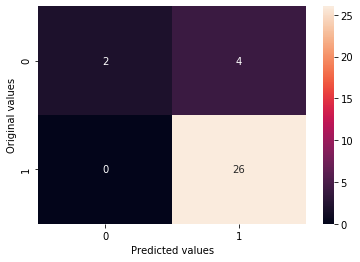

In [135]:
sn.heatmap(confusion_matrix2, annot=True)

In [136]:
len(y2_pred[y2_pred==0])

2

In [137]:
len(y2_pred[y2_pred==1])

30

## Accuracy Score

In [138]:
print("Accuracy Score: ",accuracy_score(y2_test,y2_pred))

Accuracy Score:  0.875


## Visualization of SVM model on training set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


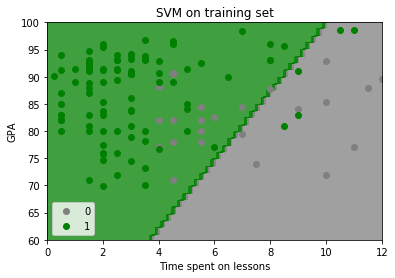

In [139]:
x2_set, y2_set = scaled2.inverse_transform(x2_train_scaled), y2_train

x1__, x2__ = np.meshgrid(np.arange(start = x2_set[:, 0].min() - 10, stop = x2_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x2_set[:, 1].min() - 1000, stop = x2_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(x1__, x2__, clas2.predict(scaled2.transform(np.array([x1__.ravel(), x2__.ravel()]).T)).reshape(x1__.shape),
             alpha = 0.75, cmap = ListedColormap(('grey', 'green')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y2_set)):
    plt.scatter(x2_set[y2_set == j, 0], x2_set[y2_set == j, 1], c = ListedColormap(('grey', 'green'))(i), label = j)
    
plt.title("SVM on training set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

## Visualization of SVM on test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


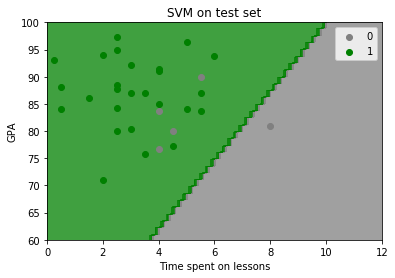

In [140]:
x2_set, y2_set = scaled2.inverse_transform(x2_test_scaled), y2_test

x1__, x2__ = np.meshgrid(np.arange(start = x2_set[:, 0].min() - 10, stop = x2_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x2_set[:, 1].min() - 1000, stop = x2_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(x1__, x2__, clas2.predict(scaled2.transform(np.array([x1__.ravel(), x2__.ravel()]).T)).reshape(x1__.shape),
             alpha = 0.75, cmap = ListedColormap(('grey', 'green')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y2_set)):
    plt.scatter(x2_set[y2_set == j, 0], x2_set[y2_set == j, 1], c = ListedColormap(('grey', 'green'))(i), label = j)
    
plt.title("SVM on test set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

# 4. Kernel - SVM

In [141]:
df

,time_lessons,GPA,attendance
0,4.0,90.60,1
1,7.0,84.50,0
3,2.0,80.00,1
4,7.0,98.50,1
5,2.0,91.26,1
...,...,...,...
157,1.5,92.27,1
158,10.0,72.00,0
159,2.0,74.73,1
160,3.0,83.87,1


### Determining  independent and dependent variables

In [142]:
x_3=df.iloc[:,:-1].values
y_3=df.iloc[:,-1].values

In [143]:
x_3

array([[ 4.  , 90.6 ],
       [ 7.  , 84.5 ],
       [ 2.  , 80.  ],
       [ 7.  , 98.5 ],
       [ 2.  , 91.26],
       [ 2.5 , 80.  ],
       [ 3.  , 86.  ],
       [ 4.5 , 71.  ],
       [ 4.5 , 82.  ],
       [ 2.  , 85.33],
       [ 8.5 , 95.56],
       [ 1.5 , 92.3 ],
       [ 2.5 , 72.  ],
       [ 5.5 , 80.  ],
       [ 3.5 , 75.7 ],
       [ 1.5 , 88.83],
       [ 6.  , 93.9 ],
       [ 0.25, 90.11],
       [ 0.3 , 47.  ],
       [ 1.5 , 86.  ],
       [ 2.  , 95.4 ],
       [12.  , 89.5 ],
       [12.5 , 80.  ],
       [ 4.  , 76.63],
       [ 2.  , 76.  ],
       [ 1.5 , 91.73],
       [ 9.  , 91.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 77.  ],
       [ 3.5 , 87.  ],
       [ 1.5 , 81.  ],
       [ 5.  , 84.  ],
       [ 3.  , 94.2 ],
       [ 1.5 , 80.  ],
       [ 1.5 , 83.  ],
       [ 4.5 , 77.2 ],
       [ 5.  , 84.  ],
       [ 2.  , 83.67],
       [ 2.5 , 91.5 ],
       [11.  , 77.  ],
       [ 3.  , 87.  ],
       [ 4.5 , 96.5 ],
       [ 0.5 , 88.03],
       [ 1.

In [144]:
y_3

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

## Train and test split

In [145]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x_3, y_3, test_size = 0.2, random_state = 1)

In [146]:
x3_train

array([[ 2.5 , 76.  ],
       [ 1.5 , 80.  ],
       [ 0.5 , 87.  ],
       [ 5.5 , 78.  ],
       [ 4.  , 82.  ],
       [ 3.  , 79.  ],
       [ 5.  , 80.  ],
       [ 3.  , 94.  ],
       [ 5.5 , 92.6 ],
       [ 4.  , 77.  ],
       [ 5.  , 85.  ],
       [ 2.5 , 91.3 ],
       [ 8.  , 96.  ],
       [ 0.25, 90.11],
       [10.  , 92.85],
       [ 4.5 , 89.  ],
       [11.  , 98.6 ],
       [ 7.  , 79.47],
       [ 0.3 , 47.  ],
       [ 1.5 , 92.  ],
       [ 2.  , 91.26],
       [ 3.5 , 93.  ],
       [ 1.  , 89.  ],
       [11.  , 77.  ],
       [ 5.  , 84.  ],
       [ 3.  , 81.  ],
       [ 0.5 , 94.04],
       [ 0.5 , 83.  ],
       [ 2.5 , 72.  ],
       [ 1.5 , 92.3 ],
       [ 2.  , 77.5 ],
       [ 0.5 , 82.  ],
       [ 2.5 , 89.43],
       [10.5 , 98.67],
       [ 2.  , 80.  ],
       [ 9.  , 83.  ],
       [ 3.  , 86.  ],
       [ 4.  , 90.6 ],
       [ 5.  , 84.  ],
       [ 4.5 , 96.  ],
       [ 4.5 , 90.5 ],
       [ 2.  , 83.  ],
       [11.5 , 88.  ],
       [ 6.

In [147]:
y3_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

## Scaling the data

In [148]:
scaled3=StandardScaler()

In [149]:
x3_train_scaled=scaled3.fit_transform(x3_train)
x3_test_scaled=scaled3.transform(x3_test)

In [150]:
x3_test_scaled

array([[ 0.01234152, -0.0940246 ],
       [ 0.18567749, -0.72273298],
       [ 0.35901346,  1.33943053],
       [ 0.35901346, -0.21976627],
       [ 0.18567749, -1.07480968],
       [-0.33433042,  0.15745876],
       [-0.16099445, -1.2634222 ],
       [ 0.01234152, -1.1364231 ],
       [-0.50766639,  1.45259804],
       [-0.50766639,  1.16339218],
       [-0.68100236, -1.85440808],
       [-0.50766639,  0.24799277],
       [ 2.95905303, -1.98014976],
       [-0.33433042,  0.81131548],
       [-1.28767826,  0.91190882],
       [-0.50766639, -0.72273298],
       [ 0.01234152, -0.26629069],
       [ 0.70568541,  1.02507633],
       [-0.85433834,  0.03171708],
       [-0.16099445,  0.15745876],
       [ 1.39902929, -0.59699131],
       [-0.68100236,  1.0376505 ],
       [-0.33433042, -0.68501048],
       [ 0.01234152,  0.70192022],
       [-0.50766639, -0.19461794],
       [-0.50766639,  0.34732869],
       [ 0.53234944,  0.53342637],
       [-1.20101028,  0.28697269],
       [-1.20101028,

## Kernel - SVM model on training set

In [151]:
from sklearn.svm import SVC

In [152]:
clas3 = SVC(kernel = 'rbf', random_state = 0)
clas3.fit(x3_train_scaled, y3_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

## Predicting training results

In [153]:
clas3.predict(([[10,69]]))

array([1], dtype=int64)

In [154]:
scaled3.transform(([[10,69]]))

array([[ 2.09237318, -2.10589144]])

In [155]:
clas3.predict(scaled3.transform(([[10,69]])))

array([0], dtype=int64)

## Predicting test results

In [156]:
y3_pred=clas3.predict(x3_test_scaled)

In [157]:
y3_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

## Confusion Matrix

In [158]:
y3_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [159]:
y3_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [160]:
data3={"Original values (y3_test)": y3_test,
      "Predicted values (y3_pred)": y3_pred}

In [161]:
data3_=pd.DataFrame(data3)

In [162]:
data3_

,Original values (y3_test),Predicted values (y3_pred)
0,1,1
1,0,0
2,1,1
3,1,0
4,1,0
5,1,1
6,1,1
7,0,1
8,1,1
9,1,1


In [163]:
confusion_matrix3=pd.crosstab(data3_['Original values (y3_test)'],data3_['Predicted values (y3_pred)'],
                            rownames=['Original values'], colnames=['Predicted values'])

In [164]:
confusion_matrix3

Predicted values,0,1
Original values,,
0,3,3
1,4,22


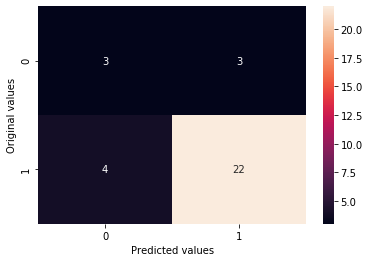

In [165]:
sn.heatmap(confusion_matrix3, annot=True)

In [166]:
len(y3_pred[y_pred==0])

2

In [167]:
len(y3_pred[y_pred==1])

30

## Accuracy Score

In [168]:
print("Accuracy Score: ",accuracy_score(y3_test,y3_pred))

Accuracy Score:  0.78125


## Visualization of Kernel - SVM on training set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


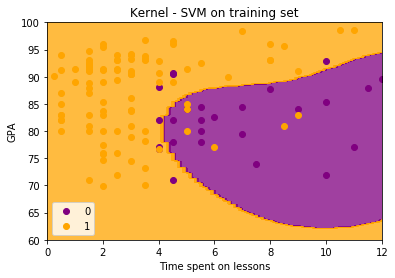

In [169]:
x3_set, y3_set = scaled3.inverse_transform(x3_train_scaled), y3_train

x1___, x2___ = np.meshgrid(np.arange(start = x3_set[:, 0].min() - 10, stop = x3_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x3_set[:, 1].min() - 1000, stop = x3_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(x1___, x2___, clas3.predict(scaled3.transform(np.array([x1___.ravel(), x2___.ravel()]).T)).reshape(x1___.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'orange')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y3_set)):
    plt.scatter(x3_set[y3_set == j, 0], x3_set[y3_set == j, 1], c = ListedColormap(('purple', 'orange'))(i), label = j)
    
plt.title("Kernel - SVM on training set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

## Visualization of Kernel - SVM on test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


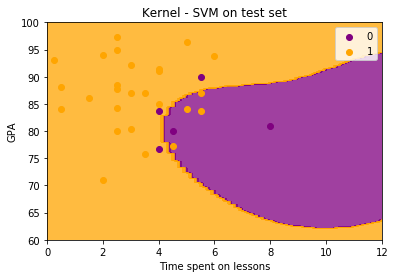

In [170]:
x3_set, y3_set = scaled3.inverse_transform(x3_test_scaled), y3_test

x1___, x2___ = np.meshgrid(np.arange(start = x3_set[:, 0].min() - 10, stop = x3_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x3_set[:, 1].min() - 1000, stop = x3_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(x1___, x2___, clas3.predict(scaled3.transform(np.array([x1___.ravel(), x2___.ravel()]).T)).reshape(x1___.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'orange')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y3_set)):
    plt.scatter(x3_set[y3_set == j, 0], x3_set[y3_set == j, 1], c = ListedColormap(('purple', 'orange'))(i), label = j)
    
plt.title("Kernel - SVM on test set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

# 5. Naive Bayes

In [171]:
df

,time_lessons,GPA,attendance
0,4.0,90.60,1
1,7.0,84.50,0
3,2.0,80.00,1
4,7.0,98.50,1
5,2.0,91.26,1
...,...,...,...
157,1.5,92.27,1
158,10.0,72.00,0
159,2.0,74.73,1
160,3.0,83.87,1


### Determining  independent and dependent variables

In [172]:
x_4=df.iloc[:,:-1].values
y_4=df.iloc[:,-1].values

In [173]:
x_4

array([[ 4.  , 90.6 ],
       [ 7.  , 84.5 ],
       [ 2.  , 80.  ],
       [ 7.  , 98.5 ],
       [ 2.  , 91.26],
       [ 2.5 , 80.  ],
       [ 3.  , 86.  ],
       [ 4.5 , 71.  ],
       [ 4.5 , 82.  ],
       [ 2.  , 85.33],
       [ 8.5 , 95.56],
       [ 1.5 , 92.3 ],
       [ 2.5 , 72.  ],
       [ 5.5 , 80.  ],
       [ 3.5 , 75.7 ],
       [ 1.5 , 88.83],
       [ 6.  , 93.9 ],
       [ 0.25, 90.11],
       [ 0.3 , 47.  ],
       [ 1.5 , 86.  ],
       [ 2.  , 95.4 ],
       [12.  , 89.5 ],
       [12.5 , 80.  ],
       [ 4.  , 76.63],
       [ 2.  , 76.  ],
       [ 1.5 , 91.73],
       [ 9.  , 91.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 77.  ],
       [ 3.5 , 87.  ],
       [ 1.5 , 81.  ],
       [ 5.  , 84.  ],
       [ 3.  , 94.2 ],
       [ 1.5 , 80.  ],
       [ 1.5 , 83.  ],
       [ 4.5 , 77.2 ],
       [ 5.  , 84.  ],
       [ 2.  , 83.67],
       [ 2.5 , 91.5 ],
       [11.  , 77.  ],
       [ 3.  , 87.  ],
       [ 4.5 , 96.5 ],
       [ 0.5 , 88.03],
       [ 1.

In [174]:
y_4

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

## Train and test split

In [175]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x_4, y_4, test_size = 0.2, random_state = 1)

In [176]:
x4_test

array([[ 4.  , 85.  ],
       [ 4.5 , 80.  ],
       [ 5.  , 96.4 ],
       [ 5.  , 84.  ],
       [ 4.5 , 77.2 ],
       [ 3.  , 87.  ],
       [ 3.5 , 75.7 ],
       [ 4.  , 76.71],
       [ 2.5 , 97.3 ],
       [ 2.5 , 95.  ],
       [ 2.  , 71.  ],
       [ 2.5 , 87.72],
       [12.5 , 70.  ],
       [ 3.  , 92.2 ],
       [ 0.25, 93.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 83.63],
       [ 6.  , 93.9 ],
       [ 1.5 , 86.  ],
       [ 3.5 , 87.  ],
       [ 8.  , 81.  ],
       [ 2.  , 94.  ],
       [ 3.  , 80.3 ],
       [ 4.  , 91.33],
       [ 2.5 , 84.2 ],
       [ 2.5 , 88.51],
       [ 5.5 , 89.99],
       [ 0.5 , 88.03],
       [ 0.5 , 84.  ],
       [ 4.  , 91.  ],
       [ 5.5 , 83.66],
       [ 5.5 , 87.  ]])

## Scaling the data

In [177]:
scaled4=StandardScaler()

In [178]:
x4_train_scaled=scaled4.fit_transform(x4_train)
x4_test_scaled=scaled4.transform(x4_test)

In [179]:
x4_train_scaled

array([[-0.50766639, -1.22569969],
       [-0.85433834, -0.72273298],
       [-1.20101028,  0.15745876],
       [ 0.53234944, -0.97421634],
       [ 0.01234152, -0.47124963],
       [-0.33433042, -0.84847466],
       [ 0.35901346, -0.72273298],
       [-0.33433042,  1.0376505 ],
       [ 0.53234944,  0.86161215],
       [ 0.01234152, -1.09995802],
       [ 0.35901346, -0.0940246 ],
       [-0.50766639,  0.69814797],
       [ 1.39902929,  1.28913386],
       [-1.28767826,  0.54851538],
       [ 2.09237318,  0.89304757],
       [ 0.18567749,  0.40894211],
       [ 2.43904512,  1.61606222],
       [ 1.05235735, -0.78937607],
       [-1.27034467, -4.87220834],
       [-0.85433834,  0.78616715],
       [-0.68100236,  0.6931183 ],
       [-0.16099445,  0.91190882],
       [-1.02767431,  0.40894211],
       [ 2.43904512, -1.09995802],
       [ 0.35901346, -0.21976627],
       [-0.33433042, -0.59699131],
       [-1.20101028,  1.04268017],
       [-1.20101028, -0.34550795],
       [-0.50766639,

## Naive Bayes model on training set

In [180]:
from sklearn.naive_bayes import GaussianNB

In [181]:
clas4 = GaussianNB()
clas4.fit(x4_train_scaled, y4_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting training results

In [182]:
clas4.predict(([[2.5,99]]))

array([1], dtype=int64)

In [183]:
scaled4.transform(([[2.5,99]]))

array([[-0.50766639,  1.66635889]])

In [184]:
clas4.predict(scaled4.transform(([[2.5,99]])))

array([1], dtype=int64)

In [185]:
clas4.predict(([[-0.50766639,  1.66635889]]))

array([1], dtype=int64)

## Predicting test results

In [186]:
y4_pred=clas4.predict(x4_test_scaled)

In [187]:
y4_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Confusion Matrix

In [188]:
y4_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [189]:
y4_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [190]:
data4={"Original values (y4_test)": y4_test,
      "Predicted values (y4_pred)": y4_pred}

In [191]:
data4_=pd.DataFrame(data4)

In [192]:
data4_

,Original values (y4_test),Predicted values (y4_pred)
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,1


In [193]:
confusion_matrix4=pd.crosstab(data4_['Original values (y4_test)'],data4_['Predicted values (y4_pred)'],
                            rownames=['Original values'], colnames=['Predicted values'])

In [194]:
confusion_matrix4

Predicted values,0,1
Original values,,
0,2,4
1,0,26


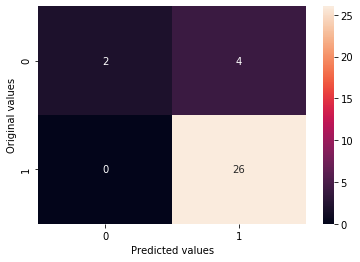

In [195]:
sn.heatmap(confusion_matrix4, annot=True)

In [196]:
len(y4_pred[y4_pred==0])

2

In [197]:
len(y4_pred[y4_pred==1])

30

## Accuracy Score

In [198]:
print("Accuracy Score: ",accuracy_score(y4_test,y4_pred))

Accuracy Score:  0.875


## Visualization of Naive Bayes model on training set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


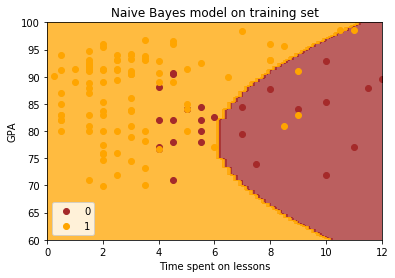

In [199]:
x4_set, y4_set = scaled4.inverse_transform(x4_train_scaled), y4_train

_x1, _x2= np.meshgrid(np.arange(start = x4_set[:, 0].min() - 10, stop = x4_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x4_set[:, 1].min() - 1000, stop = x4_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(_x1, _x2, clas4.predict(scaled4.transform(np.array([_x1.ravel(), _x2.ravel()]).T)).reshape(_x1.shape),
             alpha = 0.75, cmap = ListedColormap(('brown', 'orange')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y4_set)):
    plt.scatter(x4_set[y4_set == j, 0], x4_set[y4_set == j, 1], c = ListedColormap(('brown', 'orange'))(i), label = j)
    
plt.title("Naive Bayes model on training set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

## Visualization of Naive Bayes model on test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


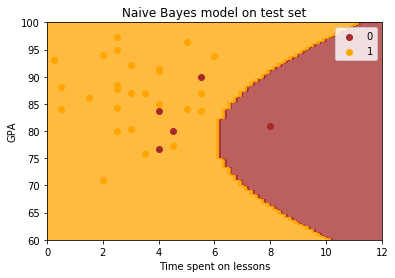

In [200]:
x4_set, y4_set = scaled4.inverse_transform(x4_test_scaled), y4_test

_x1, _x2= np.meshgrid(np.arange(start = x4_set[:, 0].min() - 10, stop = x4_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x4_set[:, 1].min() - 1000, stop = x4_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(_x1, _x2, clas4.predict(scaled4.transform(np.array([_x1.ravel(), _x2.ravel()]).T)).reshape(_x1.shape),
             alpha = 0.75, cmap = ListedColormap(('brown', 'orange')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y4_set)):
    plt.scatter(x4_set[y4_set == j, 0], x4_set[y4_set == j, 1], c = ListedColormap(('brown', 'orange'))(i), label = j)
    
plt.title("Naive Bayes model on test set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

# 6. Random Forest Classification

In [201]:
df

,time_lessons,GPA,attendance
0,4.0,90.60,1
1,7.0,84.50,0
3,2.0,80.00,1
4,7.0,98.50,1
5,2.0,91.26,1
...,...,...,...
157,1.5,92.27,1
158,10.0,72.00,0
159,2.0,74.73,1
160,3.0,83.87,1


### Determining independent and dependent variables

In [202]:
x_5=df.iloc[:,:-1].values
y_5=df.iloc[:,-1].values

In [203]:
x_5

array([[ 4.  , 90.6 ],
       [ 7.  , 84.5 ],
       [ 2.  , 80.  ],
       [ 7.  , 98.5 ],
       [ 2.  , 91.26],
       [ 2.5 , 80.  ],
       [ 3.  , 86.  ],
       [ 4.5 , 71.  ],
       [ 4.5 , 82.  ],
       [ 2.  , 85.33],
       [ 8.5 , 95.56],
       [ 1.5 , 92.3 ],
       [ 2.5 , 72.  ],
       [ 5.5 , 80.  ],
       [ 3.5 , 75.7 ],
       [ 1.5 , 88.83],
       [ 6.  , 93.9 ],
       [ 0.25, 90.11],
       [ 0.3 , 47.  ],
       [ 1.5 , 86.  ],
       [ 2.  , 95.4 ],
       [12.  , 89.5 ],
       [12.5 , 80.  ],
       [ 4.  , 76.63],
       [ 2.  , 76.  ],
       [ 1.5 , 91.73],
       [ 9.  , 91.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 77.  ],
       [ 3.5 , 87.  ],
       [ 1.5 , 81.  ],
       [ 5.  , 84.  ],
       [ 3.  , 94.2 ],
       [ 1.5 , 80.  ],
       [ 1.5 , 83.  ],
       [ 4.5 , 77.2 ],
       [ 5.  , 84.  ],
       [ 2.  , 83.67],
       [ 2.5 , 91.5 ],
       [11.  , 77.  ],
       [ 3.  , 87.  ],
       [ 4.5 , 96.5 ],
       [ 0.5 , 88.03],
       [ 1.

In [204]:
y_5

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

## Train and test split

In [205]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x_5, y_5, test_size = 0.2, random_state = 1)

In [206]:
x5_test

array([[ 4.  , 85.  ],
       [ 4.5 , 80.  ],
       [ 5.  , 96.4 ],
       [ 5.  , 84.  ],
       [ 4.5 , 77.2 ],
       [ 3.  , 87.  ],
       [ 3.5 , 75.7 ],
       [ 4.  , 76.71],
       [ 2.5 , 97.3 ],
       [ 2.5 , 95.  ],
       [ 2.  , 71.  ],
       [ 2.5 , 87.72],
       [12.5 , 70.  ],
       [ 3.  , 92.2 ],
       [ 0.25, 93.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 83.63],
       [ 6.  , 93.9 ],
       [ 1.5 , 86.  ],
       [ 3.5 , 87.  ],
       [ 8.  , 81.  ],
       [ 2.  , 94.  ],
       [ 3.  , 80.3 ],
       [ 4.  , 91.33],
       [ 2.5 , 84.2 ],
       [ 2.5 , 88.51],
       [ 5.5 , 89.99],
       [ 0.5 , 88.03],
       [ 0.5 , 84.  ],
       [ 4.  , 91.  ],
       [ 5.5 , 83.66],
       [ 5.5 , 87.  ]])

In [207]:
y5_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

## Scaling the data

In [208]:
scaled5=StandardScaler()

In [209]:
x5_train_scaled=scaled5.fit_transform(x5_train)
x5_test_scaled=scaled5.transform(x5_test)

In [210]:
x5_test_scaled

array([[ 0.01234152, -0.0940246 ],
       [ 0.18567749, -0.72273298],
       [ 0.35901346,  1.33943053],
       [ 0.35901346, -0.21976627],
       [ 0.18567749, -1.07480968],
       [-0.33433042,  0.15745876],
       [-0.16099445, -1.2634222 ],
       [ 0.01234152, -1.1364231 ],
       [-0.50766639,  1.45259804],
       [-0.50766639,  1.16339218],
       [-0.68100236, -1.85440808],
       [-0.50766639,  0.24799277],
       [ 2.95905303, -1.98014976],
       [-0.33433042,  0.81131548],
       [-1.28767826,  0.91190882],
       [-0.50766639, -0.72273298],
       [ 0.01234152, -0.26629069],
       [ 0.70568541,  1.02507633],
       [-0.85433834,  0.03171708],
       [-0.16099445,  0.15745876],
       [ 1.39902929, -0.59699131],
       [-0.68100236,  1.0376505 ],
       [-0.33433042, -0.68501048],
       [ 0.01234152,  0.70192022],
       [-0.50766639, -0.19461794],
       [-0.50766639,  0.34732869],
       [ 0.53234944,  0.53342637],
       [-1.20101028,  0.28697269],
       [-1.20101028,

## Random Forest model on training set

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
clas5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas5.fit(x5_train_scaled, y5_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting training results

In [213]:
clas5.predict(([[7,100]]))

array([1], dtype=int64)

In [214]:
scaled5.transform(([[7,100]]))

array([[1.05235735, 1.79210057]])

In [215]:
clas5.predict(scaled5.transform(([[7,100]])))

array([1], dtype=int64)

## Predicting test results

In [216]:
y5_pred=clas5.predict(x5_test_scaled)

In [217]:
y5_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

## Confusion Matrix

In [218]:
y5_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [219]:
y5_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [220]:
data5={"Original values (y5_test)": y5_test,
      "Predicted values (y5_pred)": y5_pred}

In [221]:
data5_=pd.DataFrame(data5)

In [222]:
data5_

,Original values (y5_test),Predicted values (y5_pred)
0,1,0
1,0,0
2,1,1
3,1,0
4,1,0
5,1,1
6,1,1
7,0,0
8,1,1
9,1,1


In [223]:
confusion_matrix5=pd.crosstab(data5_['Original values (y5_test)'],data5_['Predicted values (y5_pred)'],
                            rownames=['Original values'], colnames=['Predicted values'])

In [224]:
confusion_matrix5

Predicted values,0,1
Original values,,
0,5,1
1,5,21


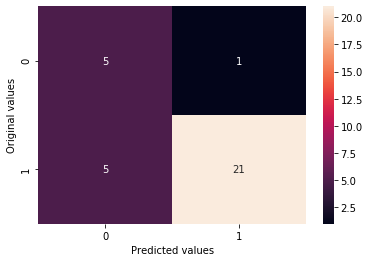

In [225]:
sn.heatmap(confusion_matrix5, annot=True)

In [226]:
len(y5_pred[y5_pred==0])

10

In [227]:
len(y5_pred[y5_pred==1])

22

## Accuracy Score

In [228]:
print("Accuracy Score: ",accuracy_score(y5_test,y5_pred))

Accuracy Score:  0.8125


## Visualization of Random Forest model on training set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


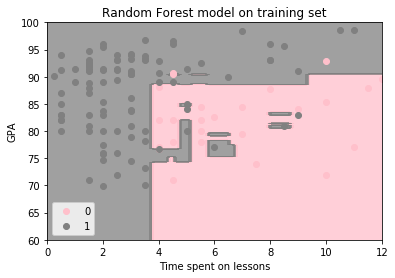

In [229]:
x5_set, y5_set = scaled5.inverse_transform(x5_train_scaled), y5_train

__x1, __x2 = np.meshgrid(np.arange(start = x5_set[:, 0].min() - 10, stop = x5_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x5_set[:, 1].min() - 1000, stop = x5_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(__x1, __x2, clas5.predict(scaled5.transform(np.array([__x1.ravel(), __x2.ravel()]).T)).reshape(__x1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'grey')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y5_set)):
    plt.scatter(x5_set[y5_set == j, 0], x5_set[y5_set == j, 1], c = ListedColormap(('pink', 'grey'))(i), label = j)
    
plt.title("Random Forest model on training set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

## Visualization of Random Forest model on test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


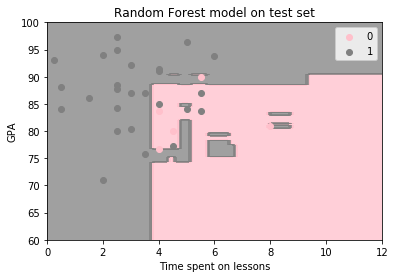

In [230]:
x5_set, y5_set = scaled5.inverse_transform(x5_test_scaled), y5_test

__x1, __x2 = np.meshgrid(np.arange(start = x5_set[:, 0].min() - 10, stop = x5_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x5_set[:, 1].min() - 1000, stop = x5_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(__x1, __x2, clas5.predict(scaled5.transform(np.array([__x1.ravel(), __x2.ravel()]).T)).reshape(__x1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'grey')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y5_set)):
    plt.scatter(x5_set[y5_set == j, 0], x5_set[y5_set == j, 1], c = ListedColormap(('pink', 'grey'))(i), label = j)
    
plt.title("Random Forest model on test set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

# 7. Decision Tree Classification

In [231]:
df

,time_lessons,GPA,attendance
0,4.0,90.60,1
1,7.0,84.50,0
3,2.0,80.00,1
4,7.0,98.50,1
5,2.0,91.26,1
...,...,...,...
157,1.5,92.27,1
158,10.0,72.00,0
159,2.0,74.73,1
160,3.0,83.87,1


### Determining independent and dependent variables

In [232]:
x_6=df.iloc[:,:-1].values
y_6=df.iloc[:,-1].values

In [233]:
x_6

array([[ 4.  , 90.6 ],
       [ 7.  , 84.5 ],
       [ 2.  , 80.  ],
       [ 7.  , 98.5 ],
       [ 2.  , 91.26],
       [ 2.5 , 80.  ],
       [ 3.  , 86.  ],
       [ 4.5 , 71.  ],
       [ 4.5 , 82.  ],
       [ 2.  , 85.33],
       [ 8.5 , 95.56],
       [ 1.5 , 92.3 ],
       [ 2.5 , 72.  ],
       [ 5.5 , 80.  ],
       [ 3.5 , 75.7 ],
       [ 1.5 , 88.83],
       [ 6.  , 93.9 ],
       [ 0.25, 90.11],
       [ 0.3 , 47.  ],
       [ 1.5 , 86.  ],
       [ 2.  , 95.4 ],
       [12.  , 89.5 ],
       [12.5 , 80.  ],
       [ 4.  , 76.63],
       [ 2.  , 76.  ],
       [ 1.5 , 91.73],
       [ 9.  , 91.  ],
       [ 2.5 , 80.  ],
       [ 4.  , 77.  ],
       [ 3.5 , 87.  ],
       [ 1.5 , 81.  ],
       [ 5.  , 84.  ],
       [ 3.  , 94.2 ],
       [ 1.5 , 80.  ],
       [ 1.5 , 83.  ],
       [ 4.5 , 77.2 ],
       [ 5.  , 84.  ],
       [ 2.  , 83.67],
       [ 2.5 , 91.5 ],
       [11.  , 77.  ],
       [ 3.  , 87.  ],
       [ 4.5 , 96.5 ],
       [ 0.5 , 88.03],
       [ 1.

In [234]:
y_6

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

## Train and test split

In [235]:
x6_train, x6_test, y6_train, y6_test = train_test_split(x_6, y_6, test_size = 0.2, random_state = 1)

In [236]:
x6_train

array([[ 2.5 , 76.  ],
       [ 1.5 , 80.  ],
       [ 0.5 , 87.  ],
       [ 5.5 , 78.  ],
       [ 4.  , 82.  ],
       [ 3.  , 79.  ],
       [ 5.  , 80.  ],
       [ 3.  , 94.  ],
       [ 5.5 , 92.6 ],
       [ 4.  , 77.  ],
       [ 5.  , 85.  ],
       [ 2.5 , 91.3 ],
       [ 8.  , 96.  ],
       [ 0.25, 90.11],
       [10.  , 92.85],
       [ 4.5 , 89.  ],
       [11.  , 98.6 ],
       [ 7.  , 79.47],
       [ 0.3 , 47.  ],
       [ 1.5 , 92.  ],
       [ 2.  , 91.26],
       [ 3.5 , 93.  ],
       [ 1.  , 89.  ],
       [11.  , 77.  ],
       [ 5.  , 84.  ],
       [ 3.  , 81.  ],
       [ 0.5 , 94.04],
       [ 0.5 , 83.  ],
       [ 2.5 , 72.  ],
       [ 1.5 , 92.3 ],
       [ 2.  , 77.5 ],
       [ 0.5 , 82.  ],
       [ 2.5 , 89.43],
       [10.5 , 98.67],
       [ 2.  , 80.  ],
       [ 9.  , 83.  ],
       [ 3.  , 86.  ],
       [ 4.  , 90.6 ],
       [ 5.  , 84.  ],
       [ 4.5 , 96.  ],
       [ 4.5 , 90.5 ],
       [ 2.  , 83.  ],
       [11.5 , 88.  ],
       [ 6.

## Scaling the data

In [237]:
scaled6=StandardScaler()

In [238]:
x6_train_scaled=scaled6.fit_transform(x6_train)
x6_test_scaled=scaled6.transform(x6_test)

In [239]:
x6_test_scaled

array([[ 0.01234152, -0.0940246 ],
       [ 0.18567749, -0.72273298],
       [ 0.35901346,  1.33943053],
       [ 0.35901346, -0.21976627],
       [ 0.18567749, -1.07480968],
       [-0.33433042,  0.15745876],
       [-0.16099445, -1.2634222 ],
       [ 0.01234152, -1.1364231 ],
       [-0.50766639,  1.45259804],
       [-0.50766639,  1.16339218],
       [-0.68100236, -1.85440808],
       [-0.50766639,  0.24799277],
       [ 2.95905303, -1.98014976],
       [-0.33433042,  0.81131548],
       [-1.28767826,  0.91190882],
       [-0.50766639, -0.72273298],
       [ 0.01234152, -0.26629069],
       [ 0.70568541,  1.02507633],
       [-0.85433834,  0.03171708],
       [-0.16099445,  0.15745876],
       [ 1.39902929, -0.59699131],
       [-0.68100236,  1.0376505 ],
       [-0.33433042, -0.68501048],
       [ 0.01234152,  0.70192022],
       [-0.50766639, -0.19461794],
       [-0.50766639,  0.34732869],
       [ 0.53234944,  0.53342637],
       [-1.20101028,  0.28697269],
       [-1.20101028,

## Decision Tree model on training set

In [240]:
from sklearn.tree import DecisionTreeClassifier

In [241]:
clas6 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
clas6.fit(x6_train_scaled, y6_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Predicting training results

In [242]:
clas6.predict(([[0.4,54]]))

array([1], dtype=int64)

In [243]:
scaled6.transform(([[0.4,54]]))

array([[-1.23567747, -3.9920166 ]])

In [244]:
clas6.predict(scaled6.transform(([[0.4,54]])))

array([1], dtype=int64)

## Predicting test results

In [245]:
y6_pred=clas6.predict(x6_test_scaled)

In [246]:
y6_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

## Confusion Matrix

In [247]:
y6_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [248]:
y6_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [249]:
data6={"Original values (y6_test)": y6_test,
      "Predicted values (y6_pred)": y6_pred}

In [250]:
data6_=pd.DataFrame(data6)

In [251]:
data6_

,Original values (y6_test),Predicted values (y6_pred)
0,1,0
1,0,0
2,1,1
3,1,0
4,1,0
5,1,1
6,1,1
7,0,0
8,1,1
9,1,1


In [252]:
confusion_matrix6=pd.crosstab(data6_['Original values (y6_test)'],data6_['Predicted values (y6_pred)'],
                            rownames=['Original values'], colnames=['Predicted values'])

In [253]:
confusion_matrix6

Predicted values,0,1
Original values,,
0,5,1
1,5,21


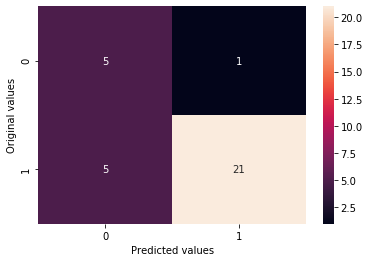

In [254]:
sn.heatmap(confusion_matrix6, annot=True)

In [255]:
len(y6_pred[y6_pred==0])

10

In [256]:
len(y6_pred[y6_pred==1])

22

## Accuracy Score

In [257]:
print("Accuracy Score: ",accuracy_score(y6_test,y6_pred))

Accuracy Score:  0.8125


## Visualization of Decision Tree model on training set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


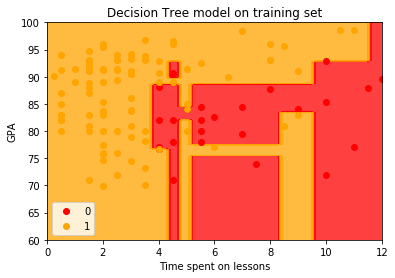

In [258]:
x6_set, y6_set = scaled6.inverse_transform(x6_train_scaled), y6_train

___x1, ___x2 = np.meshgrid(np.arange(start = x6_set[:, 0].min() - 10, stop = x6_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x6_set[:, 1].min() - 1000, stop = x6_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(___x1, ___x2, clas6.predict(scaled6.transform(np.array([___x1.ravel(), ___x2.ravel()]).T)).reshape(___x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'orange')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y6_set)):
    plt.scatter(x6_set[y6_set == j, 0], x6_set[y6_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
    
plt.title("Decision Tree model on training set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

## Visualization of Decision Tree model on test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


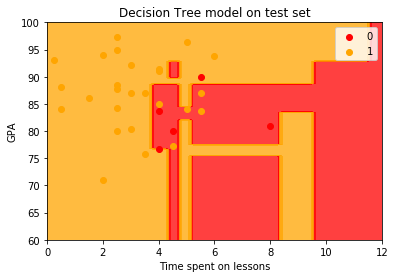

In [259]:
x6_set, y6_set = scaled6.inverse_transform(x6_test_scaled), y6_test

___x1, ___x2 = np.meshgrid(np.arange(start = x6_set[:, 0].min() - 10, stop = x6_set[:, 0].max() + 10, step = 0.2),
                     np.arange(start = x6_set[:, 1].min() - 1000, stop = x6_set[:, 1].max() + 1000, step = 0.2))

plt.contourf(___x1, ___x2, clas6.predict(scaled6.transform(np.array([___x1.ravel(), ___x2.ravel()]).T)).reshape(___x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'orange')))

plt.xlim(0,12)
plt.ylim(60,100)

for i, j in enumerate(np.unique(y6_set)):
    plt.scatter(x6_set[y6_set == j, 0], x6_set[y6_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
    
plt.title("Decision Tree model on test set")
plt.xlabel("Time spent on lessons")
plt.ylabel("GPA")
plt.legend()
plt.show()

# Comparison

In [260]:
confusion_matrix

Predicted values,0,1
Original values,,
0,2,4
1,0,26


In [261]:
confusion_matrix1

Predicted values,0,1
Original values,,
0,5,1
1,4,22


In [262]:
confusion_matrix2

Predicted values,0,1
Original values,,
0,2,4
1,0,26


In [263]:
confusion_matrix3

Predicted values,0,1
Original values,,
0,3,3
1,4,22


In [264]:
confusion_matrix4

Predicted values,0,1
Original values,,
0,2,4
1,0,26


In [265]:
confusion_matrix5

Predicted values,0,1
Original values,,
0,5,1
1,5,21


In [266]:
confusion_matrix6

Predicted values,0,1
Original values,,
0,5,1
1,5,21


In [267]:
frame=pd.DataFrame()

In [268]:
frame["Classifications"]=['Logistic','K - NN','SVM','Kernel - SVM','Naive Bayes','Random Forest','Decision Tree']

In [269]:
frame["Accuracy Scores"]=[0.875, 0.84375, 0.875, 0.78125, 0.875, 0.8125, 0.8125]

In [270]:
frame

,Classifications,Accuracy Scores
0,Logistic,0.87500
1,K - NN,0.84375
2,SVM,0.87500
3,Kernel - SVM,0.78125
4,Naive Bayes,0.87500
5,Random Forest,0.81250
6,Decision Tree,0.81250


In [271]:
# So here we can see the accuracy scores comparatively. According to this data accuracy scores and confusion matrix of 3 models
# are the same. So the most powerful models are logistic, SVM and Naive Bayes